In [13]:
import urllib.request
import bs4 as BeautifulSoup
url = 'https://g1.globo.com/politica/noticia/2022/12/06/ccj-aprova-pec-da-transicao-que-amplia-teto-de-gastos-para-pagar-bolsa-familia.ghtml'
fetched_data = urllib.request.urlopen(url)
site_read = fetched_data.read()
site_parsed = BeautifulSoup.BeautifulSoup(site_read,'html.parser')
paragraphs = site_parsed.find_all('p')
text_to_be_summarized = ''.join([p.text for p in paragraphs])
text_to_be_summarized

' Por Sara Resende e Luiz Felipe Barbiéri, TV Globo e g1 — Brasília   06/12/2022 17h34    Atualizado  06/12/2022     CCJ do Senado aprova PEC da Transição para bancar o Bolsa Família  A Comissão de Constituição e Justiça (CCJ) do Senado aprovou nesta terça-feira (6) a chamada PEC da Transição – que tem como objetivo principal assegurar o pagamento de R$ 600 do Bolsa Família (atual Auxílio Brasil). Compartilhe no WhatsAppCompartilhe no Telegram O texto foi aprovado com três mudanças principais em relação à versão inicial proposta pela transição de governo: o espaço adicional dentro do teto de gastos para acomodar o Bolsa Família caiu dos R$ 175 bilhões iniciais para R$ 145 bilhões;o prazo de vigência dessas regras para o Bolsa Família passou de quatro para dois anos;o prazo para o governo eleito encaminhar ao Congresso uma proposta de "novo regime fiscal" (entenda abaixo) passou de um ano para oito meses. A PEC garante ao presidente eleito, Luiz Inácio Lula da Silva (PT), uma margem no 

In [28]:
url = "https://drive.google.com/uc?id=1SsK4fVMWiGfMWzi7OeZId1mDcgVCbJwo"

file = urllib.request.urlopen(url)
text_to_be_summarized = file.read().decode('utf8')
file.close()

In [27]:
from gensim.summarization.summarizer import summarize

print(summarize(text_to_be_summarized, word_count=100, split=False))

ModuleNotFoundError: No module named 'gensim.summarization'

In [16]:
import nltk

language = 'portuguese'

#(1) Separar o texto em frases
nltk.download('punkt')
sentences = nltk.tokenize.sent_tokenize(text_to_be_summarized, language)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
#(2) Colocar tudo em minúsculo
lowered_sentences = [s.lower() for s in sentences]

In [18]:
#(3) Excluir as stop_words
nltk.download('stopwords')
portuguese_stop_words = nltk.corpus.stopwords.words(language)

def remove_stopwords(sentence):
    no_stopwords_sentence = " ".join([word for word in sentence
                                      if word not in portuguese_stop_words])
    return no_stopwords_sentence

no_stopwords_sentences = [remove_stopwords(s.split()) for s in lowered_sentences]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
#(4) Excluir tokens que não sejam formados apenas por letras
def remove_non_alpha(sentence):
    alpha_sentence = " ".join([word for word in sentence
                                      if word.isalnum()])
    return alpha_sentence

alpha_sentences = [remove_non_alpha(s.split()) for s in no_stopwords_sentences]

In [20]:
 #(5) Extrair o radical das palavras.
nltk.download('rslp')
stemmer = nltk.stem.RSLPStemmer()

def stemming(sentence):
   stemmed_sentence = " ".join([stemmer.stem(word) for word in sentence])
   return stemmed_sentence

stemmed_sentences = [stemming(s.split()) for s in alpha_sentences]

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [21]:
!pip install distance

In [23]:
import random
ranked_sentences = {}

for sentence in stemmed_sentences:
  ranked_sentences[sentence[:15]] = random.randint(0, 100)

print(ranked_sentences)
for sentence in stemmed_sentences:
  if ranked_sentences[sentence[:15]] > 99:
    print(sentences[stemmed_sentences.index(sentence)])

{'embarg declar': 55, 'joinvill desemb': 7, 'embarg declar t': 79, 'recurs cogn': 76, 'apen víci impli': 43, 'reve critéri de': 100, 'obje aperfeiço ': 18, 'declaratóri que': 47, 'contrad event l': 90, 'embarg penal us': 21, '': 11, 'relat discut au': 61, 'comarc joinvill': 49, 'quint câm direi': 43, 'cust': 14, 'particip realiz': 51, '2 agost': 73, 'desembarg héli ': 74, 'cdc permit inve': 7, 'propõ event téc': 31, 'sempr assim ver': 34, 'invi convicç fi': 29, 'cas únic vers c': 35, 'hipoté invers ô': 90, 'honor advocatíc': 100, 'aind val caus b': 0, 'arbitr sempr eq': 46, 'busc equilíbri ': 23, 'recurs': 96, 'recorr apont om': 33, 'equivocad pross': 99, 'defend decis co': 68, '85 ncpc confirm': 74, 'qu supress dess': 81, 'vot': 96, 'diz rev critéri': 51, 'nad diss atend ': 78, 'decis trech rel': 45, 'expost': 87, 'cdc signif evid': 46, 'tal invers ant ': 7, 'obje qualqu pro': 98, 'cas apeg aprior': 57, 'intenç dev aval': 45, 'possível defin ': 46, 'cas ocorr just ': 3, 'ant apur prop

In [25]:
from networkx import Graph, pagerank
from itertools import combinations
from operator import itemgetter
from distance import jaccard

graph = Graph()
sentence_pairs = combinations(enumerate(stemmed_sentences), 2)

for (sentence_index_a, sentence_a), (sentence_index_b, sentence_b) in sentence_pairs:
    set_a, set_b = set(sentence_a), set(sentence_b)

    # Check to avoid division by zero
    if len(set_a | set_b) == 0:
        continue  # Skip pairs where both sentences are empty

    # Calculate Jaccard similarity
    similarity = 1 - len(set_a & set_b) / float(len(set_a | set_b))

    if similarity > 0:
        graph.add_edge(sentence_index_a, sentence_index_b, weight=similarity)

ranked_sentences = list(pagerank(graph).items())

if ranked_sentences:
  sentences_by_rank = sorted(
      ranked_sentences, key=itemgetter(1), reverse=True)
  best_sentences = map(itemgetter(0), sentences_by_rank[:5])
  best_sentences_in_order = sorted(best_sentences)

print (' '.join(sentences[index] for index in best_sentences_in_order))

538, p. único, do CPC/73). 20, § 4º). 2. 2. 214).


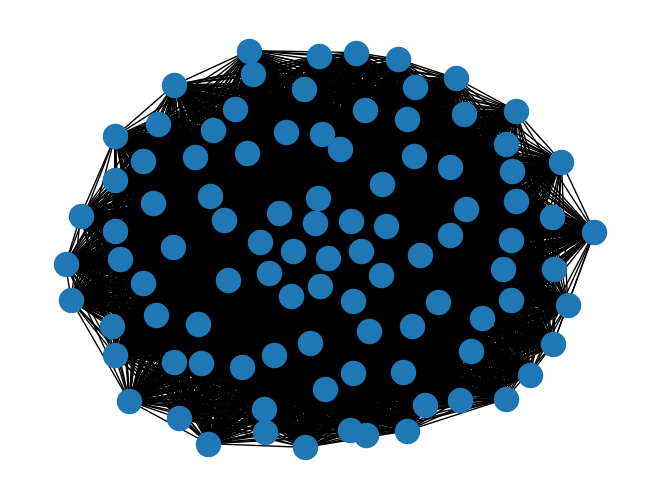

In [26]:
from networkx import draw
draw(graph)